# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
#Setting URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
api_key = w_key

#Query set up

query_url = f"{url}appid={api_key}&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = []
set_number = 1
record_number = 0

print('Beginning Data Retrieval\n ------------------------\n')

for city in cities:
    response = requests.get(query_url + city).json()
    
    
    try:
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        wind_speed= response['wind']['speed']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date =response['dt']
        
        city_data.append({'City': city,
                         'Lat':lat,
                         'Long':lng,
                         'Max temp': max_temp,
                         'Humidity': humidity,
                         'Wind Speed': wind_speed,
                         'Cloudiness': cloudiness,
                         'Country': country,
                         'Date': date})
        if record_number > 49:
            record_number = 1
            set_number += 1
            
        elif record_number <= 49:
            record_number += 1
            
        #Prevents from running more than 60 calls per minute.Worked on this portion with my tutor Trent Littel 
        time.sleep(1.01) 
        print(f'Processing Record Number {record_number} of Set {set_number}| {city}')
        
    except:
        print("City not found. Skipping city...")
        pass

Beginning Data Retrieval
 ------------------------

City not found. Skipping city...
Processing Record Number 1 of Set 1| nikolskoye
Processing Record Number 2 of Set 1| port alfred
Processing Record Number 3 of Set 1| grand gaube
Processing Record Number 4 of Set 1| ushuaia
Processing Record Number 5 of Set 1| bluff
Processing Record Number 6 of Set 1| kapit
City not found. Skipping city...
Processing Record Number 7 of Set 1| atuona
Processing Record Number 8 of Set 1| port elizabeth
Processing Record Number 9 of Set 1| jinka
Processing Record Number 10 of Set 1| los llanos de aridane
Processing Record Number 11 of Set 1| noshiro
Processing Record Number 12 of Set 1| vila praia de ancora
Processing Record Number 13 of Set 1| constitucion
Processing Record Number 14 of Set 1| eureka
Processing Record Number 15 of Set 1| albany
Processing Record Number 16 of Set 1| yar-sale
Processing Record Number 17 of Set 1| sitka
Processing Record Number 18 of Set 1| inuvik
Processing Record Number

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Created the df with the dic
weather_df = pd.DataFrame(city_data)

#display df count 
weather_df.count()

City          541
Lat           541
Long          541
Max temp      541
Humidity      541
Wind Speed    541
Cloudiness    541
Country       541
Date          541
dtype: int64

In [8]:
#Turn into a csv file
weather_df.to_csv('output_data/ities.csv')

#display the weather df 
weather_df.head()

,City,Lat,Long,Max temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,nikolskoye,59.7035,30.7861,45.00,70,8.95,0,RU,1616604505
1,port alfred,-33.5906,26.8910,71.62,72,19.60,100,ZA,1616604456
2,grand gaube,-20.0064,57.6608,80.01,82,5.57,69,MU,1616604812
3,ushuaia,-54.8000,-68.3000,42.80,81,42.57,75,AR,1616604488
4,bluff,-46.6000,168.3333,46.99,95,3.00,14,NZ,1616604735


In [65]:
#Display the df described 
weather_df.describe()

,Lat,Long,Max temp,Humidity,Wind Speed,Cloudiness,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,20.941041,16.456634,56.886765,69.353050,8.515601,56.659889,1.616605e+09
std,33.097069,90.492443,27.287840,22.766511,5.826244,37.702574,2.831932e+02
min,-54.800000,-179.166700,-28.120000,4.000000,0.380000,0.000000,1.616604e+09
25%,-6.216700,-63.141400,42.010000,58.000000,4.250000,20.000000,1.616605e+09
50%,26.541200,20.225100,62.010000,73.000000,7.000000,74.000000,1.616605e+09
75%,49.144700,93.276100,78.800000,88.000000,11.500000,91.000000,1.616605e+09
max,78.218600,179.316700,102.130000,100.000000,42.570000,100.000000,1.616606e+09


In [66]:
#Create a summary statistics df for data set

#create clean df no city or country
#clean_summary_df = weather_df.drop(columns=['City', 'Country'])

#set variables
#count = clean_summary_df.count()
#mean = clean_summary_df.mean()
#std = clean_summary_df.std()
#min_value = clean_summary_df.min()
#percent_25 = clean_summary_df.quantile(.25)
#percent_50 = clean_summary_df.quantile(.5)
#percent_75 = clean_summary_df.quantile(.75)
#max_value =  clean_summary_df.max()

#summary_table = pd.DataFrame({'count': count,
#                              'mean': mean,
#                              'std':std,
#                              'Min':min_value,
#                              '25%':percent_25,
#                              '50%':percent_50,
#                              '75%':percent_75,
#                              'Max':max_value})
#summary_table.transpose
#summary_table

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
#Inspect if any of the citys has a humidity over 100%. I did it using the describe table above and looked at the humidity max value. Since its 100.0000 I can skip this step 

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.round(2)
clean_city_data.head()

,City,Lat,Long,Max temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,nikolskoye,59.70,30.79,45.00,70,8.95,0,RU,1616604505
1,port alfred,-33.59,26.89,71.62,72,19.60,100,ZA,1616604456
2,grand gaube,-20.01,57.66,80.01,82,5.57,69,MU,1616604812
3,ushuaia,-54.80,-68.30,42.80,81,42.57,75,AR,1616604488
4,bluff,-46.60,168.33,46.99,95,3.00,14,NZ,1616604735


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

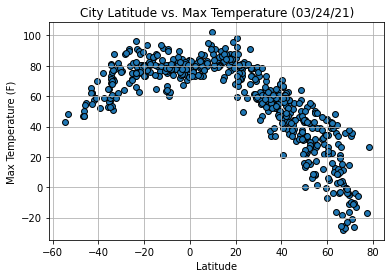

In [98]:
#Create the scatter plot Latitude vs temp
# got the format from this question on stack over flow: https://stackoverflow.com/questions/50706901/matplotlib-border-around-scatter-plot-points
plt.scatter(clean_city_data['Lat'], clean_city_data['Max temp'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Max Temperature (03/24/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_MaxTemp.png")

plt.show()

## Latitude vs. Humidity Plot

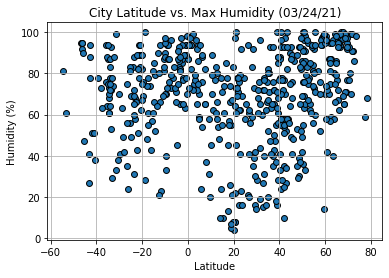

In [99]:
#Create the scatter plot Latitude vs humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Max Humidity (03/24/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

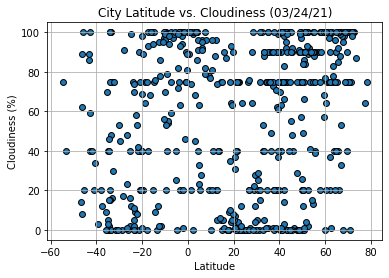

In [100]:
#Create the scatter plot Latitude vs cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Cloudiness (03/24/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

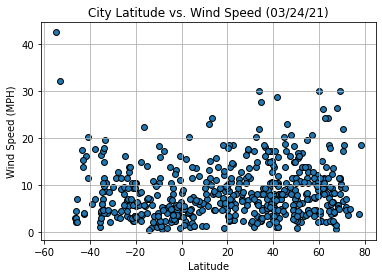

In [101]:
#Create the scatter plot Latitude vs Wind Speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Wind Speed (03/24/21)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [102]:
#Spliting the df to Northern and Southern hemisphere
nh_df= clean_city_data.loc[clean_city_data['Lat']>=0]
sh_df= clean_city_data.loc[clean_city_data['Lat']<=0]


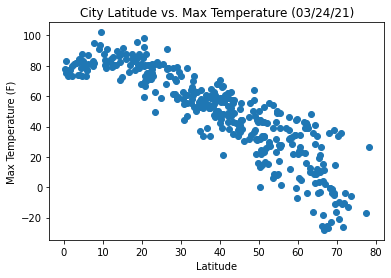

In [107]:
x_axis = nh_df['Lat']
y_axis = nh_df['Max temp']

#Create the lables
plt.title("City Latitude vs. Max Temperature (03/24/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.scatter(x_axis, y_axis);




#save image
#plt.savefig("Latitude_vs_MaxTemp.png")

plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

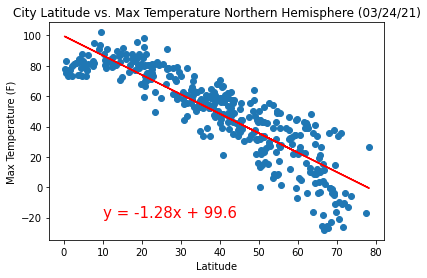

In [108]:
(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the scatter plot Latitude vs temp NH
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(10,-20),fontsize=15, color ='r')

#Create the lables
plt.title("City Latitude vs. Max Temperature Northern Hemisphere (03/24/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


#save image
plt.savefig("output_data/Regression_NtempvsLat.png.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

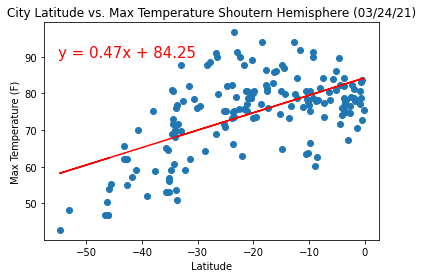

In [115]:
x_axis = sh_df['Lat']
y_axis = sh_df['Max temp']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the lables
plt.title("City Latitude vs. Max Temperature Shoutern Hemisphere (03/24/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#Create the scatter plot Latitude vs temp SH
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(-55,90),fontsize=15, color ='r')

#save image
plt.savefig("output_data/Regression_StempvsLat.png.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


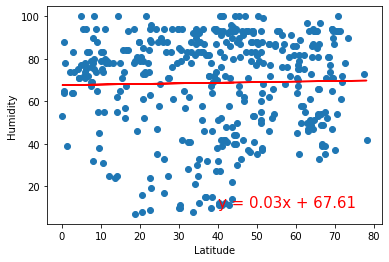

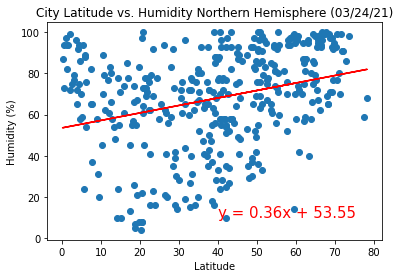

In [119]:
x_axis = nh_df['Lat']
y_axis = nh_df['Humidity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the lables
plt.title("City Latitude vs. Humidity Northern Hemisphere (03/24/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#Create the scatter plot Latitude vs temp SH
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(40,10),fontsize=15, color ='r')

#save image
plt.savefig("output_data/Regression_NhumidityvsLat.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


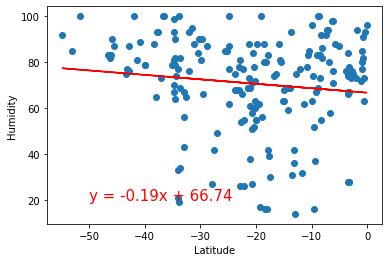

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


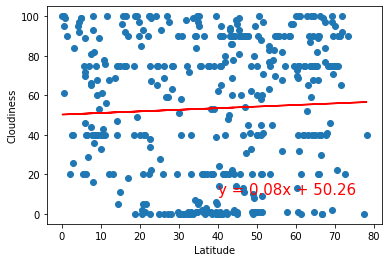

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


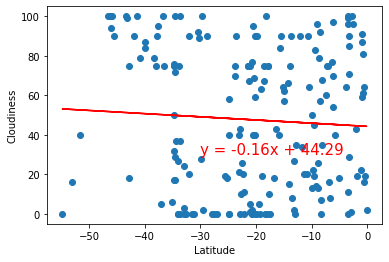

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


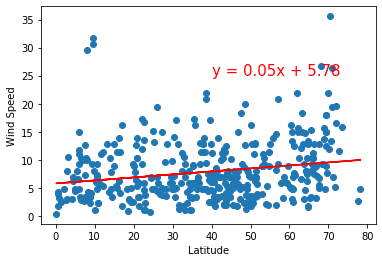

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


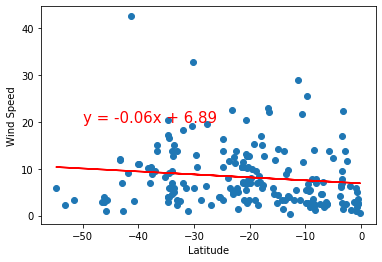